# IMPORT

In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
plt.style.use('default')


In [ ]:
import os

# 현재 작업 디렉토리 확인
current_path = os.getcwd()

# 경로 변경
os.chdir('/content/drive/MyDrive/광진구 빅데이터 공모전 파일')

In [ ]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')

# 서울 / 광진구 지하철 사용량 비교

In [ ]:
seoul_subway = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 공모전 파일/2021 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv')
seoul_subway

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202112,1호선,동대문,803,15,12276,1913,8716,5492,13464,...,7679,24,1355,0,0,0,0,0,0,20220103
1,202112,1호선,동묘앞,116,0,2423,756,3270,3915,5412,...,2491,10,1437,1,1,0,1,0,0,20220103
2,202112,1호선,서울역,769,16,8460,6094,11185,35735,34375,...,8703,61,841,0,2,0,0,0,0,20220103
3,202112,1호선,시청,37,2,1902,4537,2827,19095,6322,...,1713,28,153,0,1,0,0,0,0,20220103
4,202112,1호선,신설동,383,6,7270,2738,7731,10318,15891,...,5913,37,863,0,0,0,0,0,0,20220103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7282,202101,중앙선,원덕,15,0,228,4,346,49,470,...,89,6,26,0,0,0,0,0,0,20210203
7283,202101,중앙선,중랑,75,1,4549,374,7275,1780,17855,...,1857,6,124,0,0,0,0,0,0,20210203
7284,202101,중앙선,지평,0,0,0,0,0,0,188,...,0,0,0,0,0,0,0,0,0,20210203
7285,202101,중앙선,팔당,0,0,110,55,418,386,849,...,115,0,0,0,0,0,0,0,0,20210203


서울시 전체 7 ~ 10시 승차시간 평균, 5 ~ 8시 하차시간 평균 (단위 : 시간) 구하기기

In [ ]:
seoul_commutetime_subway = pd.DataFrame({
    'date' : seoul_subway['사용월'],
    'line' : seoul_subway['호선명'],
    'boarding_am' : (seoul_subway['07시-08시 승차인원'] + seoul_subway['08시-09시 승차인원'] + seoul_subway['09시-10시 승차인원']) / 3,
    # 아침 출근시간대 승차인원수
    'alighting_pm' : (seoul_subway['17시-18시 하차인원'] + seoul_subway['18시-19시 하차인원'] + seoul_subway['19시-20시 하차인원']) / 3,
    # 저녁 퇴근시간대 하차인원수
})

In [ ]:
seoul_boarding_alighting_subway = pd.DataFrame({
    'boarding_4to5_mean' : seoul_subway['04시-05시 승차인원'].mean(),
    'boarding_5to6_mean' : seoul_subway['05시-06시 승차인원'].mean(),
    'boarding_6to7_mean' : seoul_subway['06시-07시 승차인원'].mean(),
    'boarding_7to8_mean' : seoul_subway['07시-08시 승차인원'].mean(),
    'boarding_8to9_mean' : seoul_subway['08시-09시 승차인원'].mean(),
    'boarding_9to10_mean' : seoul_subway['09시-10시 승차인원'].mean(),
    'boarding_10to11_mean' : seoul_subway['10시-11시 승차인원'].mean(),
    'boarding_11to12_mean' : seoul_subway['11시-12시 승차인원'].mean(),
    'boarding_12to13_mean' : seoul_subway['12시-13시 승차인원'].mean(),
    'alighting_13to14_mean' : seoul_subway['13시-14시 하차인원'].mean(),
    'alighting_14to15_mean' : seoul_subway['14시-15시 하차인원'].mean(),
    'alighting_15to16_mean' : seoul_subway['15시-16시 하차인원'].mean(),
    'alighting_16to17_mean' : seoul_subway['16시-17시 하차인원'].mean(),
    'alighting_17to18_mean' : seoul_subway['17시-18시 하차인원'].mean(),
    'alighting_18to19_mean' : seoul_subway['18시-19시 하차인원'].mean(),
    'alighting_19to20_mean' : seoul_subway['19시-20시 하차인원'].mean(),
    'alighting_20to21_mean' : seoul_subway['20시-21시 하차인원'].mean(),
    'alighting_21to22_mean' : seoul_subway['21시-22시 하차인원'].mean(),
    'alighting_22to23_mean' : seoul_subway['22시-23시 하차인원'].mean(),
    'alighting_23to24_mean' : seoul_subway['23시-24시 하차인원'].mean()
}, index=[0])

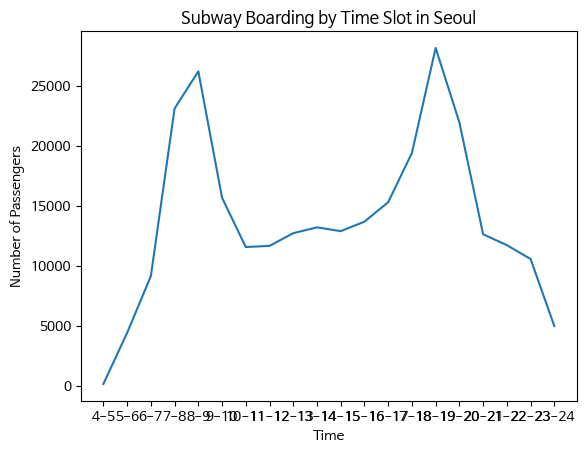

In [ ]:
x = ['4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14',
     '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']

# y축 데이터
y = seoul_boarding_alighting_subway.iloc[0]

# 꺾은 선 그래프 그리기
plt.plot(x, y)

# 그래프 제목, x축 라벨, y축 라벨 설정
plt.title('Subway Boarding by Time Slot in Seoul')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')

# 그래프 출력
plt.show()

In [ ]:
gwangjin_stations = [
    '강변(동서울터미널)', '광나루(장신대)', '구의(광진구청)', '군자(능동)', '뚝섬유원지',
    '어린이대공원(세종대)', '아차산(어린이대공원후문)', '중곡', '건대입구'
]
gwangjin_subway = seoul_subway[seoul_subway['지하철역'].isin(gwangjin_stations)]
gwangjin_subway

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
11,202112,2호선,강변(동서울터미널),18,1,7942,1756,23912,16491,71753,...,14215,2,518,0,0,0,0,0,0,20220103
12,202112,2호선,건대입구,208,8,13413,1997,19761,19680,48833,...,21145,59,3023,0,0,0,0,0,0,20220103
15,202112,2호선,구의(광진구청),52,0,12341,1161,23739,9903,62735,...,15740,14,1385,0,2,0,0,0,0,20220103
127,202112,5호선,광나루(장신대),3,0,4811,1670,14155,7156,37625,...,6533,13,227,0,0,0,0,0,0,20220103
129,202112,5호선,군자(능동),18,2,6506,831,11210,4819,32048,...,9663,2,2670,0,0,0,0,0,0,20220103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6897,202101,7호선,건대입구,23,1,2713,988,3774,5854,9879,...,2544,2,766,0,0,0,0,0,0,20210203
6901,202101,7호선,군자(능동),29,0,6635,773,11735,5032,27616,...,3938,5,228,0,0,0,0,0,0,20210203
6911,202101,7호선,뚝섬유원지,4,0,3513,366,7063,3056,15791,...,2496,0,134,0,0,0,0,0,0,20210203
6930,202101,7호선,어린이대공원(세종대),1,0,2467,603,5449,7519,14114,...,3903,3,130,0,0,0,0,0,0,20210203


In [ ]:
gwangjin_boarding_alighting_subway = pd.DataFrame({
    'boarding_4to5_mean' : gwangjin_subway['04시-05시 승차인원'].mean(),
    'boarding_5to6_mean' : gwangjin_subway['05시-06시 승차인원'].mean(),
    'boarding_6to7_mean' : gwangjin_subway['06시-07시 승차인원'].mean(),
    'boarding_7to8_mean' : gwangjin_subway['07시-08시 승차인원'].mean(),
    'boarding_8to9_mean' : gwangjin_subway['08시-09시 승차인원'].mean(),
    'boarding_9to10_mean' : gwangjin_subway['09시-10시 승차인원'].mean(),
    'boarding_10to11_mean' : gwangjin_subway['10시-11시 승차인원'].mean(),
    'boarding_11to12_mean' : gwangjin_subway['11시-12시 승차인원'].mean(),
    'boarding_12to13_mean' : gwangjin_subway['12시-13시 승차인원'].mean(),
    'alighting_13to14_mean' : gwangjin_subway['13시-14시 하차인원'].mean(),
    'alighting_14to15_mean' : gwangjin_subway['14시-15시 하차인원'].mean(),
    'alighting_15to16_mean' : gwangjin_subway['15시-16시 하차인원'].mean(),
    'alighting_16to17_mean' : gwangjin_subway['16시-17시 하차인원'].mean(),
    'alighting_17to18_mean' : gwangjin_subway['17시-18시 하차인원'].mean(),
    'alighting_18to19_mean' : gwangjin_subway['18시-19시 하차인원'].mean(),
    'alighting_19to20_mean' : gwangjin_subway['19시-20시 하차인원'].mean(),
    'alighting_20to21_mean' : gwangjin_subway['20시-21시 하차인원'].mean(),
    'alighting_21to22_mean' : gwangjin_subway['21시-22시 하차인원'].mean(),
    'alighting_22to23_mean' : gwangjin_subway['22시-23시 하차인원'].mean(),
    'alighting_23to24_mean' : gwangjin_subway['23시-24시 하차인원'].mean()
}, index=[0])

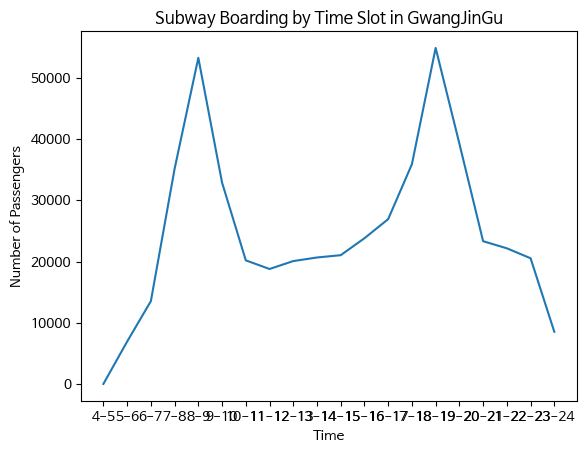

In [ ]:
x = ['4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14',
     '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']

# y축 데이터
y = gwangjin_boarding_alighting_subway.iloc[0]

# 꺾은 선 그래프 그리기
plt.plot(x, y)

# 그래프 제목, x축 라벨, y축 라벨 설정
plt.title('Subway Boarding by Time Slot in GwangJinGu')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')

# 그래프 출력
plt.show()

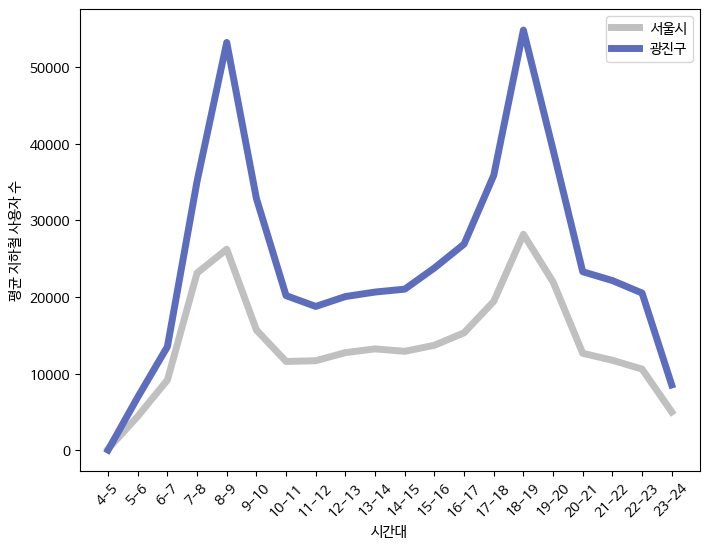

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
# 데이터프레임 값을 리스트에 저장
y1 = seoul_boarding_alighting_subway.iloc[0].tolist()
y2 = gwangjin_boarding_alighting_subway.iloc[0].tolist()

x = ['4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15',     '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']

# 그래프 그리기
plt.plot(x, y1, label='서울시', color = 'silver',  linewidth=5)
plt.plot(x, y2, label='광진구', color = '#5D6DBE',  linewidth=5)
plt.xticks(rotation=45) # x축 눈금 라벨 회전
plt.xlabel('시간대')
plt.ylabel('평균 지하철 사용자 수')
plt.legend() # 범례 표시
plt.savefig('시간대별 평균 지하철 사용자 수.png', transparent = True)
plt.show() # 그래프 출력

왜이렇게 차이가 많이 날까? -> 출퇴근시간(그래프의 형태가 출근 = 퇴근이라 출근만 표시)실질적으로 많이 사용되는 2, 7, 5호선 존재재

In [ ]:
# 서울 전 지하철 역에서 출근시간대 승차인원 평균, 퇴근시간대 하차인원 평균 구하기
seoul_commutetime_subway = pd.DataFrame({
    'line': seoul_subway['호선명'],
    'boarding_am': (seoul_subway['07시-08시 승차인원'] + seoul_subway['08시-09시 승차인원'] + seoul_subway['09시-10시 승차인원']) / 3,
    'alighting_pm': (seoul_subway['17시-18시 하차인원'] + seoul_subway['18시-19시 하차인원'] + seoul_subway['19시-20시 하차인원']) / 3
})

# pivot_table로 행이 호선, 열이 출근시간대 승차인원 평균, 퇴근시간대 하차인원 평균이 되도록 만들기
seoul_commutetime_pivot = pd.pivot_table(seoul_commutetime_subway, values=['boarding_am', 'alighting_pm'], index='line', aggfunc='mean')

# 결과 확인하기
print(seoul_commutetime_pivot)

# 2, 5, 7호선에 해당하는 데이터 추출
seoul_commutetime_pivot_subset = seoul_commutetime_pivot.loc[['2호선', '5호선', '7호선'], :]

# 결과 확인하기
print(seoul_commutetime_pivot_subset) # 전체 평균 (단위 : 시간간)

          alighting_pm   boarding_am
line                                
1호선       24142.441667  16803.969444
2호선       51686.489444  42607.960556
3호선       27091.892157  23140.911765
4호선       38011.083333  34371.957265
5호선       24480.303303  24624.488488
6호선       18588.233618  18560.476496
7호선       28776.848584  30317.544662
8호선       24244.521951  24929.341463
9호선       22679.890000  20049.804444
9호선2~3단계  12792.446581  12076.019231
경강선        6228.555556   6813.338384
경부선       23224.890313  20288.101140
경원선       15305.630556  15404.938889
경의선        9005.976540   9432.808407
경인선       37209.531944  36776.531944
경춘선        4756.919591   5223.156433
공항철도 1호선  12490.001984  11820.992063
과천선       25488.979167  25308.444444
분당선       21118.279365  17978.360317
수인선        6890.665123   6812.776235
안산선       22277.848291  21717.918803
우이신설선      8053.119658   9127.786325
일산선       22947.565657  24537.820707
장항선        3779.666667   3457.360000
중앙선       10503.288360  11055.698413
 

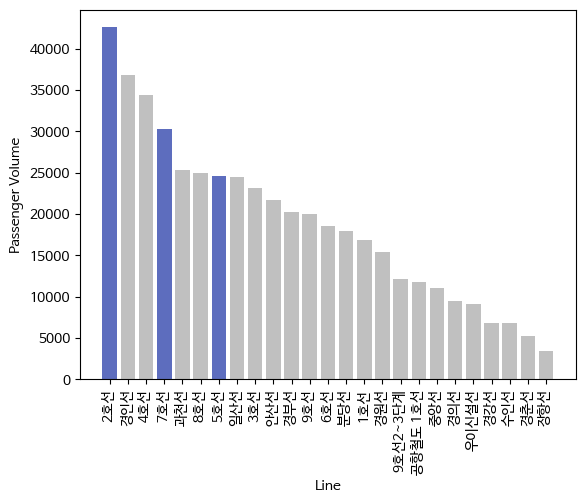

In [ ]:
seoul_commutetime_pivot_sorted = seoul_commutetime_pivot.sort_values(by='boarding_am', ascending=False)
colors = ['silver' if line not in ['2호선', '5호선', '7호선'] else '#5D6DBE' for line in seoul_commutetime_pivot_sorted.index]

# 세로 막대그래프 그리기
plt.bar(x=seoul_commutetime_pivot_sorted.index, height=seoul_commutetime_pivot_sorted['boarding_am'], color=colors)

# 그래프 타이틀과 레이블 설정하기
plt.xlabel('Line')
plt.ylabel('Passenger Volume')

# x축 눈금 레이블 회전하기
plt.xticks(rotation=90)

# 그래프 보여주기
plt.show()


만약 호선별 비교가 필요하다면 사용 !

In [ ]:
# 광진구 지하철 역에서 출근시간대 승차인원 평균, 퇴근시간대 하차인원 평균 구하기
gwangjin_commutetime_subway = pd.DataFrame({
    'date': gwangjin_subway['사용월'],
    'line': gwangjin_subway['호선명'],
    'boarding_am': (gwangjin_subway['07시-08시 승차인원'] + gwangjin_subway['08시-09시 승차인원'] + gwangjin_subway['09시-10시 승차인원']) /3,
    'alighting_pm': (gwangjin_subway['17시-18시 하차인원'] + gwangjin_subway['18시-19시 하차인원'] + gwangjin_subway['19시-20시 하차인원']) /3,
})

# 광진구 지하철 역에서 출근시간대 승차인원 평균, 퇴근시간대 하차인원 평균 pivot_table로 만들기
gwangjin_commutetime_pivot = pd.pivot_table(gwangjin_commutetime_subway, values=['boarding_am', 'alighting_pm'], index=['line'], aggfunc='mean')

# 결과 확인하기
print(gwangjin_commutetime_pivot) # 광진구 평균 (단위 : 시간)

      alighting_pm   boarding_am
line                            
2호선   81971.009259  70464.027778
5호선   34065.342593  34991.824074
7호선   25663.988889  25614.183333


#서울 / 광진구 버스 사용량 비교

In [ ]:
seoul_bus = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 공모전 파일/2021년_버스노선별_정류장별_시간대별_승하차_인원_정보.csv')
seoul_bus

<ipython-input-16-2281971ef608>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  seoul_bus = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 공모전 파일/2021년_버스노선별_정류장별_시간대별_승하차_인원_정보.csv')


,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
0,202101,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원,0,0,0,0,...,18,38,30,25,40,30,23,18,4,20210203
1,202101,100,100번(하계동~용산구청),100000003,1003,명륜3가.성대입구,0,0,0,0,...,82,79,63,68,64,43,52,11,10,20210203
2,202101,100,100번(하계동~용산구청),100000005,1005,혜화동로터리.여운형활동터,0,0,0,0,...,103,21,90,20,107,17,80,1,10,20210203
3,202101,100,100번(하계동~용산구청),100000102,1198,원남동,0,0,0,0,...,51,113,48,95,25,53,37,14,3,20210203
4,202101,100,100번(하계동~용산구청),100000108,1204,종로5가.효제동.김상옥의거터,8,6,0,0,...,27,50,19,70,29,34,15,11,13,20210203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469356,202112,6648,6648(방화동~양천구청),999800002,~,김포교통(종점가상),0,0,0,0,...,0,1,0,0,2,0,0,0,0,20220103
469357,202112,9404,9404번(분당구미~신사역),999800003,~,구미동차고지(기점가상),0,2,0,2,...,2,2,3,0,3,2,5,1,2,20220103
469358,202112,9404,9404번(분당구미~신사역),999800004,~,구미동차고지(종점가상),0,14,0,4,...,2,0,3,0,6,0,15,0,4,20220103
469359,202112,9707,9707번(고양 가좌동~영등포역),999800005,~,가좌동종점(종점가상),0,5,0,4,...,6,1,4,0,2,0,0,0,1,20220103


In [ ]:
gwangjin_ars_numbers = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 공모전 파일/광진구 버스정류장 ARS번호.csv')
gwangjin_bus = seoul_bus[seoul_bus['버스정류장ARS번호'].isin(gwangjin_ars_numbers['버스정류장ARS번호'])]
gwangjin_bus

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
82619,202103,130,130번(우이동~길동),104000001,5001,군자교입구,178,237,0,0,...,361,513,278,560,260,582,308,294,298,20210403
82620,202103,3216,3216번(오금동~경희의료원),104000001,5001,군자교입구,0,0,0,0,...,195,214,140,164,163,150,191,21,33,20210403
82621,202103,N30,N30(강동공영차고지~서울역환승센터),104000001,5001,군자교입구,44,18,49,112,...,0,0,0,0,0,0,0,0,8,20210403
82622,202103,721,721번(북가좌동~건대입구역),104000001,5001,군자교입구,26,23,0,0,...,541,388,393,218,445,208,646,201,226,20210403
82623,202103,303,303번(성남~신설동),104000001,5001,군자교입구,0,0,0,0,...,564,189,419,165,482,180,600,90,358,20210403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396078,202111,광진03,광진03(중곡119안전센터~강변역),104900125,5755,중곡119안전센터,0,0,0,0,...,177,213,109,160,76,150,75,30,2,20211203
396079,202111,광진01,광진01(광진정보도서관~워커힐아파트),104900126,5990,광장자이아파트,0,0,0,0,...,76,67,30,47,40,57,45,21,22,20211203
396080,202111,광진01,광진01(광진정보도서관~워커힐아파트),104900127,5671,광장자이아파트,0,0,0,0,...,33,11,16,10,17,9,14,7,1,20211203
396081,202111,광진04,광진04(중곡아파트~강변역),104900128,5511,중곡아파트.기점,0,0,0,0,...,80,30,81,45,74,13,26,0,2,20211203


In [ ]:
seoul_boarding_alighting_bus = pd.DataFrame({
    'boarding_4to5_mean' : seoul_bus['4시승차총승객수'].mean(),
    'boarding_5to6_mean' : seoul_bus['5시승차총승객수'].mean(),
    'boarding_6to7_mean' : seoul_bus['6시승차총승객수'].mean(),
    'boarding_7to8_mean' : seoul_bus['7시승차총승객수'].mean(),
    'boarding_8to9_mean' : seoul_bus['8시승차총승객수'].mean(),
    'boarding_9to10_mean' : seoul_bus['9시승차총승객수'].mean(),
    'boarding_10to11_mean' : seoul_bus['10시승차총승객수'].mean(),
    'boarding_11to12_mean' : seoul_bus['11시승차총승객수'].mean(),
    'boarding_12to13_mean' : seoul_bus['12시승차총승객수'].mean(),
    'alighting_13to14_mean' : seoul_bus['13시하차총승객수'].mean(),
    'alighting_14to15_mean' : seoul_bus['14시하차총승객수'].mean(),
    'alighting_15to16_mean' : seoul_bus['15시하차총승객수'].mean(),
    'alighting_16to17_mean' : seoul_bus['16시하차총승객수'].mean(),
    'alighting_17to18_mean' : seoul_bus['17시하차총승객수'].mean(),
    'alighting_18to19_mean' : seoul_bus['18시하차총승객수'].mean(),
    'alighting_19to20_mean' : seoul_bus['19시하차총승객수'].mean(),
    'alighting_20to21_mean' : seoul_bus['20시하차총승객수'].mean(),
    'alighting_21to22_mean' : seoul_bus['21시하차총승객수'].mean(),
    'alighting_22to23_mean' : seoul_bus['22시하차총승객수'].mean(),
    'alighting_23to24_mean' : seoul_bus['23시하차총승객수'].mean()
}, index=[0])

In [ ]:
gwangjin_boarding_alighting_bus = pd.DataFrame({
    'boarding_4to5_mean' : gwangjin_bus['4시승차총승객수'].mean(),
    'boarding_5to6_mean' : gwangjin_bus['5시승차총승객수'].mean(),
    'boarding_6to7_mean' : gwangjin_bus['6시승차총승객수'].mean(),
    'boarding_7to8_mean' : gwangjin_bus['7시승차총승객수'].mean(),
    'boarding_8to9_mean' : gwangjin_bus['8시승차총승객수'].mean(),
    'boarding_9to10_mean' : gwangjin_bus['9시승차총승객수'].mean(),
    'boarding_10to11_mean' : gwangjin_bus['10시승차총승객수'].mean(),
    'boarding_11to12_mean' : gwangjin_bus['11시승차총승객수'].mean(),
    'boarding_12to13_mean' : gwangjin_bus['12시승차총승객수'].mean(),
    'alighting_13to14_mean' : gwangjin_bus['13시하차총승객수'].mean(),
    'alighting_14to15_mean' : gwangjin_bus['14시하차총승객수'].mean(),
    'alighting_15to16_mean' : gwangjin_bus['15시하차총승객수'].mean(),
    'alighting_16to17_mean' : gwangjin_bus['16시하차총승객수'].mean(),
    'alighting_17to18_mean' : gwangjin_bus['17시하차총승객수'].mean(),
    'alighting_18to19_mean' : gwangjin_bus['18시하차총승객수'].mean(),
    'alighting_19to20_mean' : gwangjin_bus['19시하차총승객수'].mean(),
    'alighting_20to21_mean' : gwangjin_bus['20시하차총승객수'].mean(),
    'alighting_21to22_mean' : gwangjin_bus['21시하차총승객수'].mean(),
    'alighting_22to23_mean' : gwangjin_bus['22시하차총승객수'].mean(),
    'alighting_23to24_mean' : gwangjin_bus['23시하차총승객수'].mean()
}, index=[0])

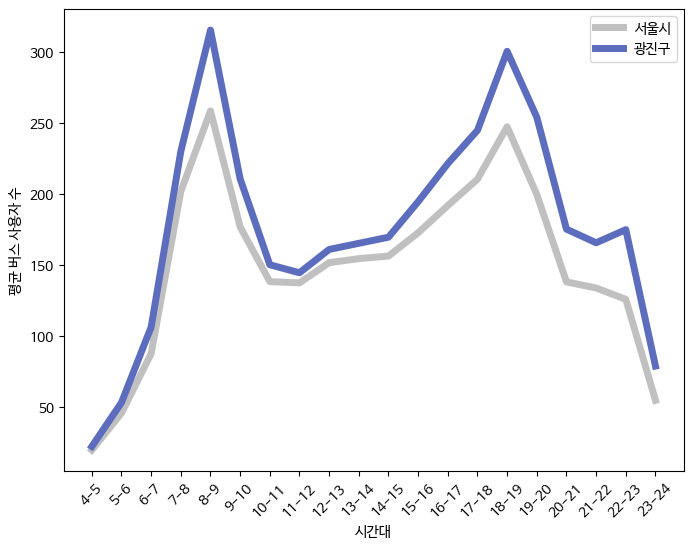

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# 데이터프레임 값을 리스트에 저장
y1 = seoul_boarding_alighting_bus.iloc[0].tolist()
y2 = gwangjin_boarding_alighting_bus.iloc[0].tolist()

x = ['4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15',
     '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']

# 그래프 그리기
plt.plot(x, y1, label='서울시',color = 'silver',  linewidth=5)
plt.plot(x, y2, label='광진구', color = '#5D6DBE', linewidth=5)
plt.xlabel('시간대')
plt.ylabel('평균 버스 사용자 수')
plt.xticks(rotation=45) # x축 눈금 라벨 회전
plt.legend() # 범례 표시
plt.savefig('시간대별 평균 버스 사용자 수.png',transparent = True )
plt.show() # 그래프 출력

# 서울시 구 별 통학/통근을 하지 않는 인원 비율 비교

서울 / 광진구 통학을 하지 않음 비율

In [ ]:
seoul_noncommute = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 공모전 파일/2021년 통근, 통학을 하지 않는 인구 비율.csv')
seoul_noncommute['통근ㆍ통학하지 않는다'] = 100.0 - seoul_noncommute['통근ㆍ통학하지 않는다']
seoul_noncommute

,자치구,통근ㆍ통학하지 않는다
0,종로구,70.3
1,중구,67.1
2,용산구,68.3
3,성동구,64.7
4,광진구,73.7
5,동대문구,65.5
6,중랑구,65.4
7,성북구,70.6
8,강북구,63.0
9,도봉구,59.8


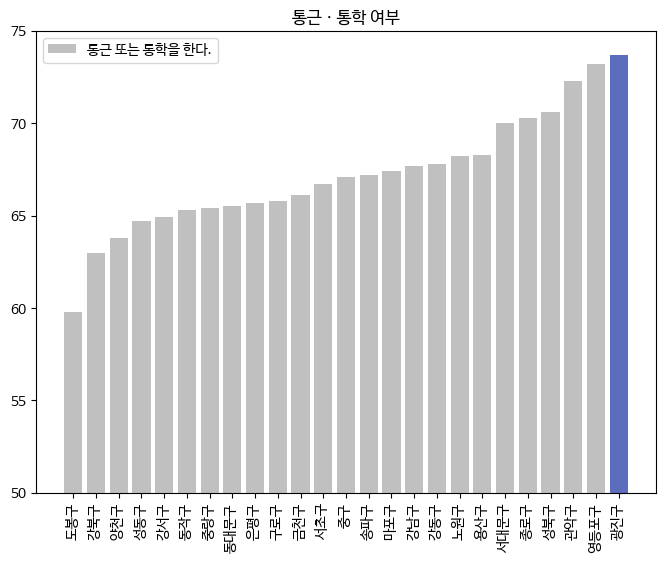

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
# 통근, 통학하지 않는 비율 기준으로 오름차순 정렬
seoul_noncommute = seoul_noncommute.sort_values(by="통근ㆍ통학하지 않는다")

# 광진구와 다른 자치구를 구분하여 색상 설정
colors = ['#5D6DBE' if x == '광진구' else 'silver' for x in seoul_noncommute['자치구']]

# 시각화
plt.title('통근ㆍ통학 여부')
plt.bar(seoul_noncommute['자치구'], seoul_noncommute['통근ㆍ통학하지 않는다'], color=colors, label = '통근 또는 통학을 한다.')
plt.xticks(rotation=90)
plt.legend()
plt.ylim(50, 75)
plt.show()

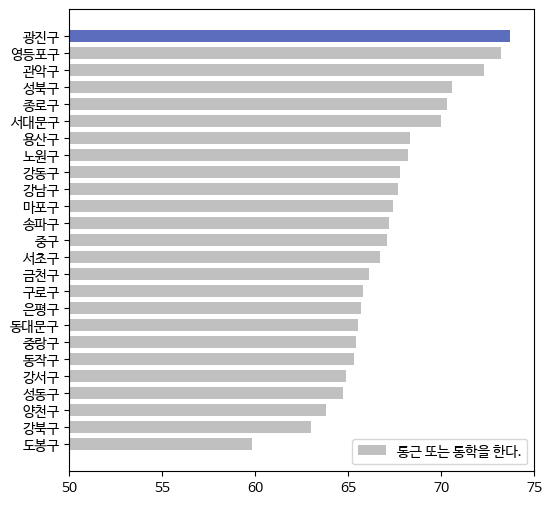

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.barh(seoul_noncommute['자치구'], seoul_noncommute['통근ㆍ통학하지 않는다'], color=colors, height=0.7, label='통근 또는 통학을 한다.')
ax.set_xlim(50, 75)
plt.legend()
plt.savefig('구별 통근, 통학 여부.png', transparent = True)
plt.show()

# 대중교통 사용량과 따릉이와의 연계성을 위한 지도 표시 ( 광진구 )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
usage = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 공모전 파일/대중교통 사용량, 따릉이 사용량.csv')
usage = usage.rename(columns={
    '구분' : 'year',
    '대중교통 사용량 (버스, 지하철)': 'public_transportation',
    '따릉이 대여건수': 'bike',
})
usage = usage[usage['year'] != 2020]
usage

,year,public_transportation,bike,따릉이 회원수
0,2015,10744,114,34
1,2016,10606,1612,211
2,2017,10500,2031,597
3,2018,10374,10062,1093
4,2019,10445,19075,1730


In [ ]:
location = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 공모전 파일/통합 위치정보.csv')
location

,종류,위도,경도
0,버스,37.558741,127.075646
1,버스,37.558794,127.074900
2,버스,37.556099,127.082473
3,버스,37.556223,127.081565
4,버스,37.554497,127.086551
...,...,...,...
412,지하철,37.531558,127.066714
413,지하철,37.547962,127.074650
414,지하철,37.552005,127.089609
415,지하철,37.565877,127.084291


In [ ]:
location.loc[location['종류'] == '버스', '종류'] = '버스정류장'
location.loc[location['종류'] == '지하철', '종류'] = '지하철역'
location.loc[location['종류'] == '자전거', '종류'] = '자전거대여소'
location['종류'].unique()

array(['버스정류장', '자전거대여소', '지하철역'], dtype=object)

<Axes: title={'center': '자전거, 지하철, 버스정류장 위치'}, xlabel='경도', ylabel='위도'>

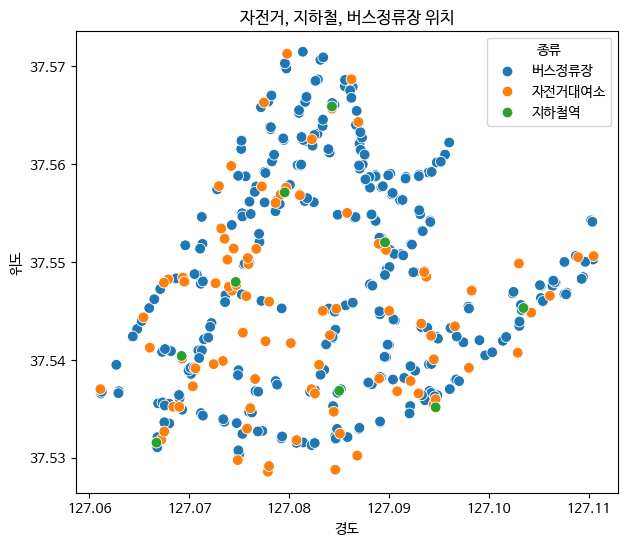

In [ ]:
plt.figure(figsize=(7, 6))
plt.title("자전거, 지하철, 버스정류장 위치")
sns.scatterplot(data=location, x="경도", y="위도",hue = "종류", s = 60)

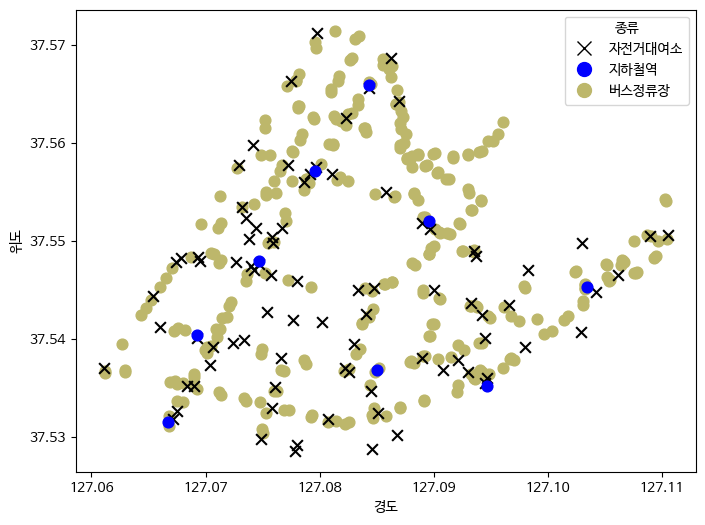

In [ ]:
plt.figure(figsize=(8, 6))

# 종류에 따라 색상과 마커 지정
colors = {'자전거대여소': 'black', '지하철역': 'blue', '버스정류장': 'darkkhaki'}
markers = {'자전거대여소': 'x', '지하철역': 'o', '버스정류장': 'o'}

# 산점도 그래프 그리기
for i, row in location.iterrows():
    plt.scatter(row['경도'], row['위도'], color=colors[row['종류']], marker=markers[row['종류']], s=60)

# 범례 추가하기
handles = []
for category, color in colors.items():
    marker = markers[category]
    handle = plt.plot([], [], color=color, marker=marker, ls="", markersize=10, label=category)[0]
    handles.append(handle)
plt.legend(handles=handles, title='종류')

# 축 라벨 설정하기
plt.xlabel('경도')
plt.ylabel('위도')

plt.show()


In [ ]:
# 많이 사용되는 버스정류장 찾기

In [ ]:
gwangjin_ars_numbers = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 공모전 파일/광진구 버스정류장 ARS번호.csv')
gwangjin_bus = seoul_bus[seoul_bus['버스정류장ARS번호'].isin(gwangjin_ars_numbers['버스정류장ARS번호'])]
gwangjin_bus

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
82619,202103,130,130번(우이동~길동),104000001,5001,군자교입구,178,237,0,0,...,361,513,278,560,260,582,308,294,298,20210403
82620,202103,3216,3216번(오금동~경희의료원),104000001,5001,군자교입구,0,0,0,0,...,195,214,140,164,163,150,191,21,33,20210403
82621,202103,N30,N30(강동공영차고지~서울역환승센터),104000001,5001,군자교입구,44,18,49,112,...,0,0,0,0,0,0,0,0,8,20210403
82622,202103,721,721번(북가좌동~건대입구역),104000001,5001,군자교입구,26,23,0,0,...,541,388,393,218,445,208,646,201,226,20210403
82623,202103,303,303번(성남~신설동),104000001,5001,군자교입구,0,0,0,0,...,564,189,419,165,482,180,600,90,358,20210403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396078,202111,광진03,광진03(중곡119안전센터~강변역),104900125,5755,중곡119안전센터,0,0,0,0,...,177,213,109,160,76,150,75,30,2,20211203
396079,202111,광진01,광진01(광진정보도서관~워커힐아파트),104900126,5990,광장자이아파트,0,0,0,0,...,76,67,30,47,40,57,45,21,22,20211203
396080,202111,광진01,광진01(광진정보도서관~워커힐아파트),104900127,5671,광장자이아파트,0,0,0,0,...,33,11,16,10,17,9,14,7,1,20211203
396081,202111,광진04,광진04(중곡아파트~강변역),104900128,5511,중곡아파트.기점,0,0,0,0,...,80,30,81,45,74,13,26,0,2,20211203


In [ ]:
gwanjin_bus_boarding_alighting = gwangjin_bus[['버스정류장ARS번호','7시승차총승객수', '8시승차총승객수', '9시승차총승객수',
                                              '17시하차총승객수', '18시하차총승객수', '19시하차총승객수']]
# 연별 출퇴근(6시간) "버스정류장" 사용량
gwanjin_bus_boarding_alighting['연별 출퇴근시간 버스정류장 사용량'] = gwanjin_bus_boarding_alighting .iloc[:, 1:].sum(axis=1)
gwanjin_bus_boarding_alighting = gwanjin_bus_boarding_alighting.groupby(['버스정류장ARS번호']).sum()
gwanjin_bus_boarding_alighting = gwanjin_bus_boarding_alighting.drop(['7시승차총승객수', '8시승차총승객수', '9시승차총승객수',
                                                                        '17시하차총승객수', '18시하차총승객수', '19시하차총승객수'], axis=1)
gwanjin_bus_boarding_alighting = gwanjin_bus_boarding_alighting.sort_values('연별 출퇴근시간 버스정류장 사용량', ascending=False)
gwanjin_bus_boarding_alighting

<ipython-input-32-a8a7714b593d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwanjin_bus_boarding_alighting['연별 출퇴근시간 버스정류장 사용량'] = gwanjin_bus_boarding_alighting .iloc[:, 1:].sum(axis=1)


,연별 출퇴근시간 버스정류장 사용량
버스정류장ARS번호,
5007,94876
5006,70205
5004,64573
5001,61067
5191,59841
...,...
5738,17
5269,0
5271,0


In [ ]:
top_50 = gwanjin_bus_boarding_alighting.sort_values(by='연별 출퇴근시간 버스정류장 사용량', ascending=False).head(50)
top_50
top_50_bus_stop = top_50.index
top_50_bus_stop

Int64Index([5007, 5006, 5004, 5001, 5191, 5002, 5145, 5003, 5188, 5005, 5218,
            5185, 5220, 5194, 5148, 5250, 5175, 5008, 5232, 5253, 5190, 5162,
            5012, 5204, 5011, 5229, 5189, 5582, 5193, 5152, 5249, 5183, 5187,
            5258, 5234, 5227, 5226, 5217, 5141, 5999, 5153, 5154, 5192, 5010,
            5139, 5151, 5009, 5138, 5146, 5580],
           dtype='int64', name='버스정류장ARS번호')

In [ ]:
location_bus = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 공모전 파일/버스정류장 번호별 경도 위도.csv')
top_50_bus_stop_numbers = location_bus.loc[location_bus['버스정류장ARS번호'].isin(top_50_bus_stop), :]
top_50_bus_stop_numbers

,버스정류장ARS번호,경도,위도
0,5001,127.075646,37.558741
1,5002,127.074900,37.558794
2,5003,127.082473,37.556099
3,5004,127.081565,37.556223
4,5005,127.086551,37.554497
5,5006,127.090149,37.551208
6,5007,127.089245,37.552423
7,5008,127.084866,37.554827
8,5009,127.093499,37.548918
9,5010,127.092614,37.548958


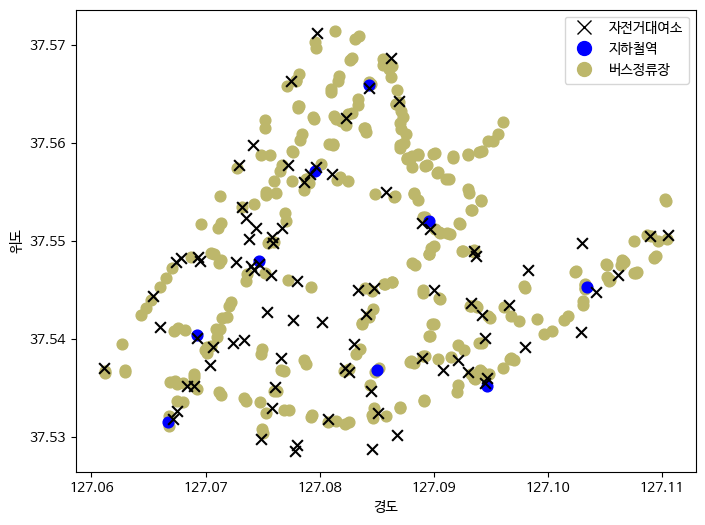

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# 배경색 설정
#ax.set_facecolor('lightgray')

# 그리드 추가
#ax.grid(color='white', linewidth=1.5, linestyle='-', zorder=0)

# 종류에 따라 색상과 마커 지정
colors = {'자전거대여소': 'black', '지하철역': 'blue', '버스정류장': 'darkkhaki'}
markers = {'자전거대여소': 'x', '지하철역': 'o', '버스정류장': 'o'}

# 산점도 그래프 그리기
for category in ['버스정류장', '지하철역','자전거대여소']:
        data = location[location['종류'] == category].sort_values('경도')
        plt.scatter(data['경도'], data['위도'], color=colors[category], marker=markers[category], s=60, zorder=2)

# 범례 추가하기
handles = []
for category, color in colors.items():
    marker = markers[category]
    handle = plt.plot([], [], color=color, marker=marker, ls="", markersize=10, label=category)[0]
    handles.append(handle)
plt.legend(handles=handles)

# 축 라벨 설정하기
plt.xlabel('경도')
plt.ylabel('위도')

plt.savefig('자전거, 지하철, 버스 위치', transparent=True)
plt.show()

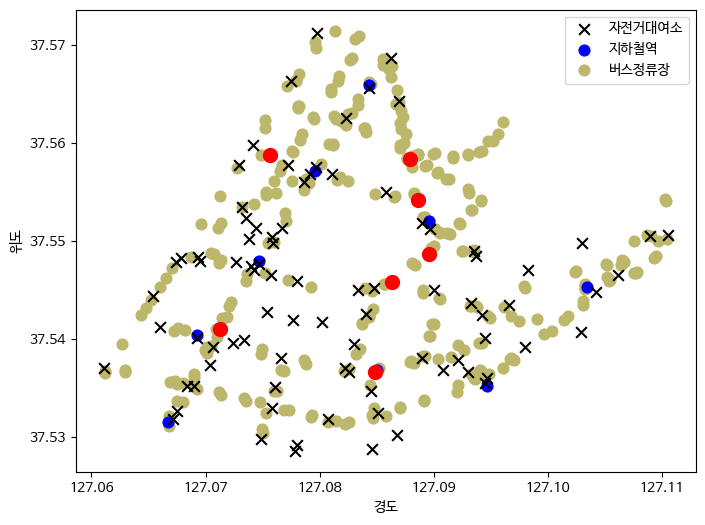

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# 배경색 설정
# ax.set_facecolor('lightgray')

# 그리드 추가
# ax.grid(color='white', linewidth=1.5, linestyle='-', zorder=0)

# 종류에 따라 색상과 마커 지정
colors = {'자전거대여소': 'black', '지하철역': 'blue', '버스정류장': 'darkkhaki'}
markers = {'자전거대여소': 'x', '지하철역': 'o', '버스정류장': 'o'}

# 산점도 그래프 그리기
for category in ['버스정류장', '지하철역', '자전거대여소']:
    data = location[location['종류'] == category].sort_values('경도')
    plt.scatter(data['경도'], data['위도'], color=colors[category], marker=markers[category], s=60, zorder=2)

ax.scatter(top_50_bus_stop_numbers.loc[top_50_bus_stop_numbers['버스정류장ARS번호'].isin([5138, 5152, 5154, 5232, 5001, 5139, 5580])]['경도'],
           top_50_bus_stop_numbers.loc[top_50_bus_stop_numbers['버스정류장ARS번호'].isin([5138, 5152, 5154, 5232, 5001, 5139, 5580])]['위도'],
           color='red', marker='o', s=100, label='특정 버스정류장', zorder=5)

# 범례 추가하기
handles = []
for category in ['자전거대여소', '지하철역', '버스정류장']:
    color = colors[category]
    marker = markers[category]
    handle = ax.scatter([], [], color=color, marker=marker, s=60, zorder=2, label=category)
    handles.append(handle)
ax.legend(handles=handles)


# 축 라벨 설정하기
ax.set_xlabel('경도')
ax.set_ylabel('위도')

plt.savefig('자전거, 지하철, 버스 위치+추천.png', transparent=True)
plt.show()


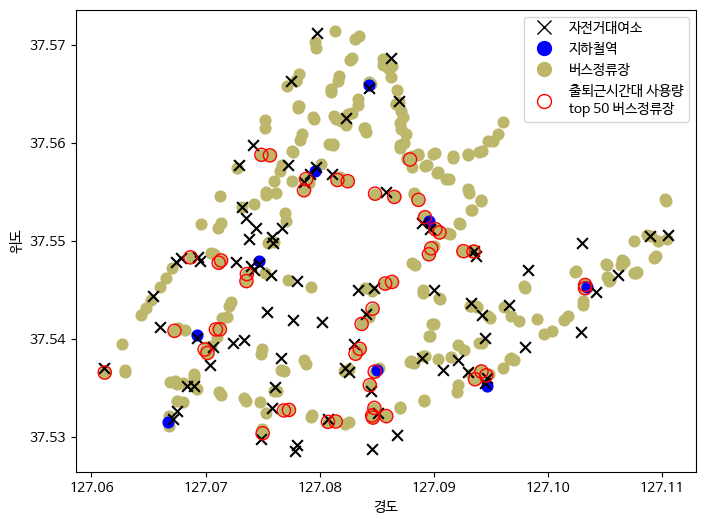

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# 배경색 설정
#ax.set_facecolor('lightgray')

# 그리드 추가
#ax.grid(color='white', linewidth=1.5, linestyle='-', zorder=0)

# 종류에 따라 색상과 마커 지정
colors = {'자전거대여소': 'black', '지하철역': 'blue', '버스정류장': 'darkkhaki'}
markers = {'자전거대여소': 'x', '지하철역': 'o', '버스정류장': 'o'}

# 산점도 그래프 그리기
for category in ['버스정류장', '지하철역', 'top_50_bus', '자전거대여소']:
    if category == 'top_50_bus':
        for i, row in top_50_bus_stop_numbers.iterrows():
            plt.scatter(row['경도'], row['위도'], facecolors='none', edgecolors='r', s=90, zorder = 3)

    else:
        data = location[location['종류'] == category].sort_values('경도')
        plt.scatter(data['경도'], data['위도'], color=colors[category], marker=markers[category], s=60, zorder=2)

# 범례 추가하기
handles = []
for category, color in colors.items():
    marker = markers[category]
    handle = plt.plot([], [], color=color, marker=marker, ls="", markersize=10, label=category)[0]
    handles.append(handle)
handles.append(plt.plot([], [], marker='o', markeredgecolor='r', markerfacecolor='none', ls="", markersize=10, label='출퇴근시간대 사용량\ntop 50 버스정류장')[0])
plt.legend(handles=handles)



# 축 라벨 설정하기
plt.xlabel('경도')
plt.ylabel('위도')

plt.savefig('자전거, 지하철, 버스 위치 & top.png', transparent=True)
plt.show()

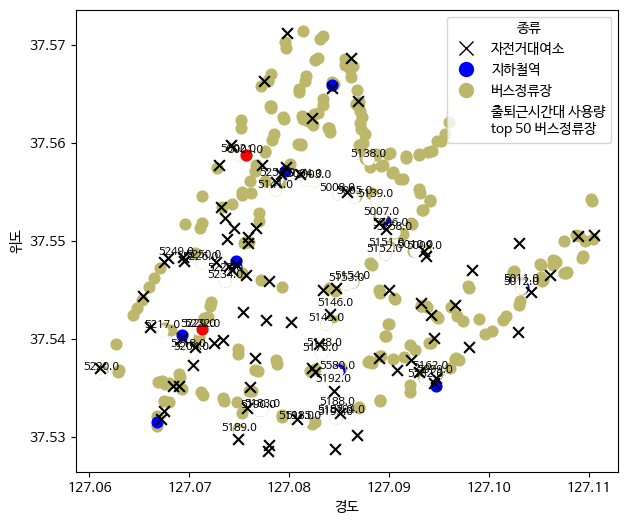

In [ ]:
plt.figure(figsize=(7, 6))

# 종류에 따라 색상과 마커 지정
colors = {'자전거대여소': 'black', '지하철역': 'blue', '버스정류장': 'darkkhaki'}
markers = {'자전거대여소': 'x', '지하철역': 'o', '버스정류장': 'o'}

# 산점도 그래프 그리기
for category in ['버스정류장', '지하철역', 'top_50_bus', '자전거대여소']:
    if category == 'top_50_bus':
        for i, row in top_50_bus_stop_numbers.iterrows():
            plt.scatter(row['경도'], row['위도'], color='white', marker='o', s=60)
            plt.text(row['경도'], row['위도'],row['버스정류장ARS번호'], ha='center', va='bottom', color='black', fontsize=8)

    else:
        data = location[location['종류'] == category].sort_values('경도')
        plt.scatter(data['경도'], data['위도'], color=colors[category], marker=markers[category], s=60)

# 범례 추가하기
handles = []
for category, color in colors.items():
    marker = markers[category]
    handle = plt.plot([], [], color=color, marker=marker, ls="", markersize=10, label=category)[0]
    handles.append(handle)
handles.append(plt.plot([], [], color='white', marker='o', ls="", markersize=10, label='출퇴근시간대 사용량\ntop 50 버스정류장')[0])
plt.legend(handles=handles, title='종류')
plt.scatter([127.071264],
            [ 37.540981],
            color='red', marker='o', s=60) #5232
plt.scatter([127.075646	],
            [	37.558741],
            color='red', marker='o', s=60) #5001


# 축 라벨 설정하기
plt.xlabel('경도')
plt.ylabel('위도')

plt.show()


In [ ]:
seoul_bus = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 공모전 파일/2021년_버스노선별_정류장별_시간대별_승하차_인원_정보.csv')
seoul_bus

<ipython-input-39-2281971ef608>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  seoul_bus = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 공모전 파일/2021년_버스노선별_정류장별_시간대별_승하차_인원_정보.csv')


,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
0,202101,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원,0,0,0,0,...,18,38,30,25,40,30,23,18,4,20210203
1,202101,100,100번(하계동~용산구청),100000003,1003,명륜3가.성대입구,0,0,0,0,...,82,79,63,68,64,43,52,11,10,20210203
2,202101,100,100번(하계동~용산구청),100000005,1005,혜화동로터리.여운형활동터,0,0,0,0,...,103,21,90,20,107,17,80,1,10,20210203
3,202101,100,100번(하계동~용산구청),100000102,1198,원남동,0,0,0,0,...,51,113,48,95,25,53,37,14,3,20210203
4,202101,100,100번(하계동~용산구청),100000108,1204,종로5가.효제동.김상옥의거터,8,6,0,0,...,27,50,19,70,29,34,15,11,13,20210203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469356,202112,6648,6648(방화동~양천구청),999800002,~,김포교통(종점가상),0,0,0,0,...,0,1,0,0,2,0,0,0,0,20220103
469357,202112,9404,9404번(분당구미~신사역),999800003,~,구미동차고지(기점가상),0,2,0,2,...,2,2,3,0,3,2,5,1,2,20220103
469358,202112,9404,9404번(분당구미~신사역),999800004,~,구미동차고지(종점가상),0,14,0,4,...,2,0,3,0,6,0,15,0,4,20220103
469359,202112,9707,9707번(고양 가좌동~영등포역),999800005,~,가좌동종점(종점가상),0,5,0,4,...,6,1,4,0,2,0,0,0,1,20220103


# 서울시 자치구별 버스 사용량


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
plt.style.use('default')


In [ ]:
import os

# 현재 작업 디렉토리 확인
current_path = os.getcwd()

# 경로 변경
os.chdir('/content/drive/MyDrive/광진구 빅데이터 공모전 파일')

In [ ]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')

In [ ]:
seoul_bus = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 공모전 파일/2021년_버스노선별_정류장별_시간대별_승하차_인원_정보.csv')
seoul_bike = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 공모전 파일/따릉이사용량.csv')

seoul_bus

<ipython-input-57-b24470a6971e>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  seoul_bus = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 공모전 파일/2021년_버스노선별_정류장별_시간대별_승하차_인원_정보.csv')


,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
0,202101,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원,0,0,0,0,...,18,38,30,25,40,30,23,18,4,20210203
1,202101,100,100번(하계동~용산구청),100000003,1003,명륜3가.성대입구,0,0,0,0,...,82,79,63,68,64,43,52,11,10,20210203
2,202101,100,100번(하계동~용산구청),100000005,1005,혜화동로터리.여운형활동터,0,0,0,0,...,103,21,90,20,107,17,80,1,10,20210203
3,202101,100,100번(하계동~용산구청),100000102,1198,원남동,0,0,0,0,...,51,113,48,95,25,53,37,14,3,20210203
4,202101,100,100번(하계동~용산구청),100000108,1204,종로5가.효제동.김상옥의거터,8,6,0,0,...,27,50,19,70,29,34,15,11,13,20210203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469356,202112,6648,6648(방화동~양천구청),999800002,~,김포교통(종점가상),0,0,0,0,...,0,1,0,0,2,0,0,0,0,20220103
469357,202112,9404,9404번(분당구미~신사역),999800003,~,구미동차고지(기점가상),0,2,0,2,...,2,2,3,0,3,2,5,1,2,20220103
469358,202112,9404,9404번(분당구미~신사역),999800004,~,구미동차고지(종점가상),0,14,0,4,...,2,0,3,0,6,0,15,0,4,20220103
469359,202112,9707,9707번(고양 가좌동~영등포역),999800005,~,가좌동종점(종점가상),0,5,0,4,...,6,1,4,0,2,0,0,0,1,20220103


In [ ]:

# 버스정류장ARS번호열의 값을 5자리 문자열로 변환
seoul_bus['버스정류장ARS번호'] = seoul_bus['버스정류장ARS번호'].astype(str).str.zfill(5)

# 왼쪽 두 자리 숫자를 추출하여 해당 숫자와 같으면 구 이름으로 대체
district_dict = {
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'
}
seoul_bus['구'] = seoul_bus['버스정류장ARS번호'].str[:2].map(district_dict)

seoul_bus

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자,구
0,202101,100,100번(하계동~용산구청),100000002,01002,창경궁.서울대학교병원,0,0,0,0,...,38,30,25,40,30,23,18,4,20210203,종로구
1,202101,100,100번(하계동~용산구청),100000003,01003,명륜3가.성대입구,0,0,0,0,...,79,63,68,64,43,52,11,10,20210203,종로구
2,202101,100,100번(하계동~용산구청),100000005,01005,혜화동로터리.여운형활동터,0,0,0,0,...,21,90,20,107,17,80,1,10,20210203,종로구
3,202101,100,100번(하계동~용산구청),100000102,01198,원남동,0,0,0,0,...,113,48,95,25,53,37,14,3,20210203,종로구
4,202101,100,100번(하계동~용산구청),100000108,01204,종로5가.효제동.김상옥의거터,8,6,0,0,...,50,19,70,29,34,15,11,13,20210203,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469356,202112,6648,6648(방화동~양천구청),999800002,0000~,김포교통(종점가상),0,0,0,0,...,1,0,0,2,0,0,0,0,20220103,NaN
469357,202112,9404,9404번(분당구미~신사역),999800003,0000~,구미동차고지(기점가상),0,2,0,2,...,2,3,0,3,2,5,1,2,20220103,NaN
469358,202112,9404,9404번(분당구미~신사역),999800004,0000~,구미동차고지(종점가상),0,14,0,4,...,0,3,0,6,0,15,0,4,20220103,NaN
469359,202112,9707,9707번(고양 가좌동~영등포역),999800005,0000~,가좌동종점(종점가상),0,5,0,4,...,1,4,0,2,0,0,0,1,20220103,NaN


In [ ]:
import pandas as pd

# 불필요한 열 제거

# ARS번호를 5자리 문자열로 변환
seoul_bus['버스정류장ARS번호'] = seoul_bus['버스정류장ARS번호'].astype(str).str.zfill(5)

# ARS번호에서 구 번호 추출
seoul_bus['구'] = seoul_bus['버스정류장ARS번호'].str[:2].map(district_dict)


# 구별 승차 총승객수 계산
df_grouped = seoul_bus.groupby('구').sum().reset_index()

# 결과 출력
df_grouped

<ipython-input-59-866b6d0a4880>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = seoul_bus.groupby('구').sum().reset_index()


,구,사용년월,표준버스정류장ID,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,2시승차총승객수,2시하차총승객수,3시승차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
0,강남구,5073277564,3069623758151,370392,348170,82262,77768,48189,41243,39285,...,5156385,4263683,3393230,4644559,3456372,4311002,3390685,1288182,1181146,507348962706
1,강동구,2303004686,1414337163743,123331,216645,27510,45967,14705,11526,11794,...,2240992,1425178,1544734,1410421,1510019,1233374,1440451,510352,684790,230310266285
2,강북구,2944287417,1576446754439,177782,343657,39411,74817,14304,22189,19226,...,3601227,2539597,2550065,2316114,2323729,1930701,2110905,834646,1060713,294440907804
3,강서구,4331344407,2467913834109,171532,277019,37302,54164,25750,31632,23113,...,3727286,2296639,2584760,2284043,2553970,1974467,2414354,691729,1001181,433152391293
4,관악구,3964521378,2356116151193,223290,326903,27577,51924,25446,40735,30768,...,5851010,3900795,4173052,3834789,3948562,3465261,3790345,1432844,1807297,396468766248
5,광진구,1855338322,963665089760,149246,180800,42622,59469,23957,30013,21369,...,2243119,1363060,1573404,1369492,1572105,1222539,1481868,473173,623129,185541782540
6,구로구,3390740897,1950598716433,160382,190312,20339,27749,15481,25089,32053,...,3696395,2809934,2514888,2794059,2426959,2385550,2155452,985279,928989,339088146531
7,금천구,2537648510,1472896831949,71590,160553,11327,15564,8844,6631,12312,...,3199037,1777644,2085505,1663131,2011320,1197103,1770516,427694,789222,253775234668
8,노원구,3921473183,2157850744045,172649,264794,27907,50335,18378,19372,27388,...,3002763,2213315,2110936,2193918,1988349,2015398,1954527,757947,857918,392163766409
9,도봉구,2548360623,1394410453219,128384,248390,25951,70419,13131,18430,26403,...,2821262,1545809,1950623,1410478,1796864,1189073,1668324,516241,842313,254846548227


In [ ]:
time_columns = ['7시승차총승객수', '8시승차총승객수', '9시승차총승객수',
                '17시하차총승객수', '18시하차총승객수', '19시하차총승객수']

other_columns = seoul_bus.drop(time_columns, axis=1).columns
grouped = seoul_bus.groupby('구')[time_columns].mean()
grouped
transposed = grouped.T
transposed = transposed.sum()
transposed = pd.DataFrame(transposed)
transposed.rename(columns={0: '정류장 당 버스사용량'}, inplace=True)
transposed = transposed.sort_values(by='정류장 당 버스사용량', ascending=False)

seoul_bus = transposed
seoul_bus

,정류장 당 버스사용량
구,
관악구,1820.651050
금천구,1646.485505
용산구,1609.263342
강북구,1542.395250
동작구,1524.114693
동대문구,1512.805706
서초구,1507.611917
성북구,1495.870063
구로구,1493.765274


In [ ]:
seoul_bike_bus = pd.read_csv('/content/drive/MyDrive/광진구 빅데이터 공모전 파일/따릉이사용량.csv')

# 스케일링된 데이터프레임 출력
(seoul_bike_bus)
seoul_bike_bus['자전거 사용량'] = seoul_bike_bus['자전거 사용량'] / 365

In [ ]:
# 광진구 데이터 추출
gwangjin = seoul_bike_bus[seoul_bike_bus['자치구'] == '광진구']

# 자전거 사용량의 순위 계산
gwangjin['자전거 사용량 순위'] = seoul_bike_bus['자전거 사용량'].rank(method='min', ascending=False)

# 버스 사용량의 순위 계산
gwangjin['버스 사용량 순위'] = seoul_bike_bus['버스 사용량'].rank(method='min', ascending=False)

# 결과 출력
print(gwangjin)

    자치구   자전거 사용량    버스 사용량  자전거 사용량 순위  버스 사용량 순위
19  광진구  0.389363  0.604004         7.0       10.0


<ipython-input-62-69a6687bb70d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin['자전거 사용량 순위'] = seoul_bike_bus['자전거 사용량'].rank(method='min', ascending=False)
<ipython-input-62-69a6687bb70d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin['버스 사용량 순위'] = seoul_bike_bus['버스 사용량'].rank(method='min', ascending=False)


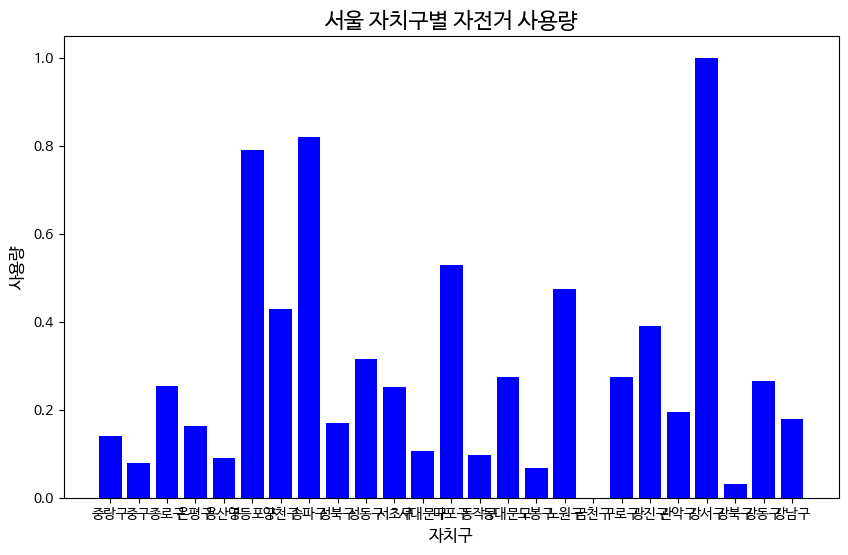

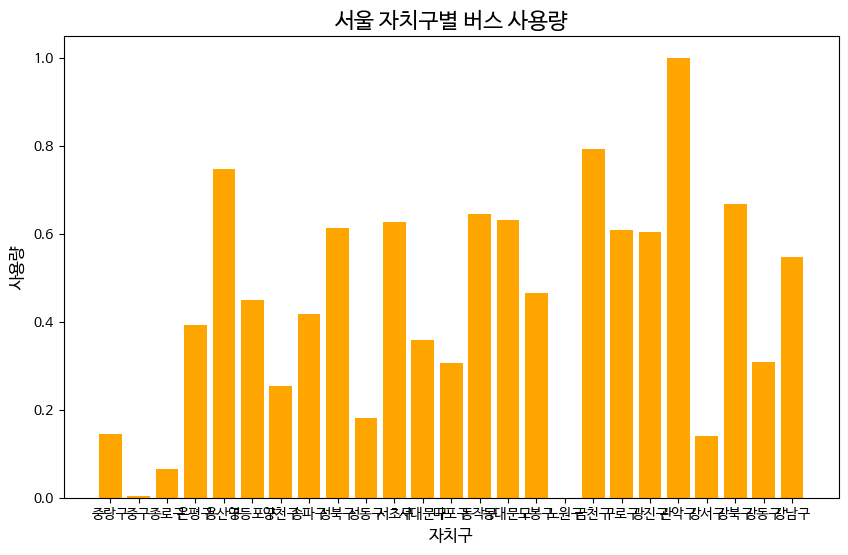

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 자전거 사용량 막대 그래프 그리기
plt.bar(seoul_bike_bus['자치구'], seoul_bike_bus['자전거 사용량'], color='blue', label='자전거 사용량')

# x축 라벨, 제목 설정
plt.xlabel('자치구', fontsize=12)
plt.ylabel('사용량', fontsize=12)
plt.title('서울 자치구별 자전거 사용량', fontsize=16)

# 그래프 출력
plt.show()

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 버스 사용량 막대 그래프 그리기
plt.bar(seoul_bike_bus['자치구'], seoul_bike_bus['버스 사용량'], color='orange', label='버스 사용량')

# x축 라벨, 제목 설정
plt.xlabel('자치구', fontsize=12)
plt.ylabel('사용량', fontsize=12)
plt.title('서울 자치구별 버스 사용량', fontsize=16)

# 그래프 출력
plt.show()


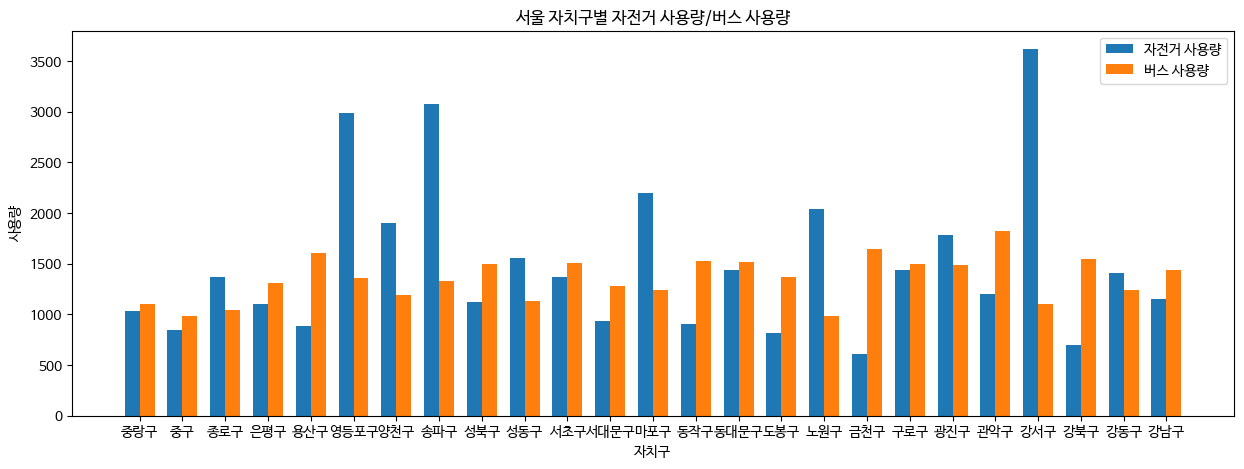

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 막대그래프 설정
fig, ax = plt.subplots(figsize=(15, 5))
bar_width = 0.35

# 자전거 사용량 막대그래프
ax.bar(np.arange(len(seoul_bike_bus)), seoul_bike_bus['자전거 사용량'], bar_width, label='자전거 사용량')

# 버스 사용량 막대그래프
ax.bar(np.arange(len(seoul_bike_bus))+bar_width, seoul_bike_bus['버스 사용량'], bar_width, label='버스 사용량')

# 그래프 설정
ax.set_xticks(np.arange(len(seoul_bike_bus)) + bar_width/2)
ax.set_xticklabels(seoul_bike_bus['자치구'])
ax.legend()
ax.set_xlabel('자치구')
ax.set_ylabel('사용량')
ax.set_title('서울 자치구별 자전거 사용량/버스 사용량')
plt.show()